# Learning linear models from data

Much of the power of data comes from it's ability to help us predict unknown (e.g., future) quantities. 

Let's build a simple model to predict the mpg of cars from the other information we have available on those cars.

In [1]:
# then we'll import our other commonly used packages and read our data
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                'model', 'origin', 'car_name']

mpg_df = pd.read_csv(url,
                     delim_whitespace=True,
                     header=None,
                     names=column_names)

In [2]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


## Cleaning data

First let's keep our X (attributes, training data) separate from our y (target variable, attribute to be predicted)

In [9]:
# we'll use these columns as the features we will use in our predictions
predictors = ["weight", "horsepower", "acceleration", "cylinders", "displacement"]
# and this column as a target
target = "mpg"

# drop any NaNs for now
cleaned_df = mpg_df.dropna()

In [10]:
cleaned_df[predictors].head()

,weight,horsepower,acceleration,cylinders,displacement
0,3504.0,130.0,12.0,8.0,307.0
1,3693.0,165.0,11.5,8.0,350.0
2,3436.0,150.0,11.0,8.0,318.0
3,3433.0,150.0,12.0,8.0,304.0
4,3449.0,140.0,10.5,8.0,302.0


In [11]:
cleaned_df[target].head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

## Building a model

We're now ready to build a model! 
It's very, very simple

In [12]:
from sklearn import linear_model

# build a model
linear = linear_model.LinearRegression()

# fit (means learning) the model to(from) the data!
# the first argument is the predictors, the second argument the target variable!
linear.fit(cleaned_df[predictors], cleaned_df[target])

# inspect the coefficients
pd.DataFrame([dict(zip(predictors, linear.coef_))])

,acceleration,cylinders,displacement,horsepower,weight
0,-0.029105,-0.397928,-0.000083,-0.045257,-0.005187


We fitted our linear regression. Let's now see how it predicts!

In [13]:
# get some predictions from the model
preds = linear.predict(cleaned_df[predictors])

predictions_df = cleaned_df.assign(predictions=preds)

predictions_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,predictions
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,18.647725
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,16.094377
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,18.123484
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,18.111104
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,18.524507


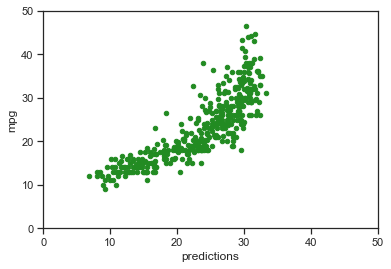

In [14]:
# and lets try a scatter plot of our predicted mpg and the true value
predictions_df.plot(kind="scatter", x="predictions", y="mpg", c='forestgreen', xlim=(0,50), ylim=(0,50))